# 1. 데이터 경로 지정

In [2]:
path_vcf = "../data/sample.vcf"

# 2. VCF 데이터 불러오기

In [3]:
with open(path_vcf, "r") as fIn:
    for line in fIn:
        print(line.strip())

##fileformat=VCFv4.1
#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	sample
##contig=<ID=chr21,length=48129895,assembly=hg19>
##contig=<ID=chr21_gl000210_random,length=27682,assembly=hg19>
chr21	9755998	.	A	T	39.77	MG_SNP_Filter	AC=1;SAMPLES_AF=0.500;AN=2;BaseQRankSum=1.23;ClippingRankSum=-1.231e+00;DP=5;FS=3.979;MLEAC=1;MLEAF=0.500;MQ=31.47;MQRankSum=-1.231e+00;QD=7.95;ReadPosRankSum=1.23;SOR=2.833;set=FilteredInAll;SNP;HET;VARTYPE=SNP;ANN=T|intergenic_region|MODIFIER|MIR3648-1|MIR3648-1|intergenic_region|MIR3648-1|||||||||	GT:AD:DP:GQ:PL	0/1:2,3:5:34:68,0,34
chr21	9825735	rs371225382	T	C	647.77	MG_SNP_Filter	AC=2;SAMPLES_AF=1.00;AN=2;DP=26;FS=0.000;MLEAC=2;MLEAF=1.00;MQ=27.75;QD=25.91;SOR=6.518;set=FilteredInAll;SNP;HOM;VARTYPE=SNP;dbSNPBuildID=138;ANN=C|upstream_gene_variant|MODIFIER|MIR3648-1|MIR3648-1|transcript|NR_037421.1|Noncoding||n.-1T>C|||||97|,C|upstream_gene_variant|MODIFIER|MIR3687-1|MIR3687-1|transcript|NR_037458.1|Noncoding||n.-1T>C|||||468|,C|intergenic_region|MODIFIER|M

# 2-1. Header(#) 없이 VCF 데이터 불러오기

In [4]:
with open(path_vcf, "r") as fIn:
    for line in fIn:
        if line.startswith("#"): pass
        else:
            print(line.strip())

chr21	9755998	.	A	T	39.77	MG_SNP_Filter	AC=1;SAMPLES_AF=0.500;AN=2;BaseQRankSum=1.23;ClippingRankSum=-1.231e+00;DP=5;FS=3.979;MLEAC=1;MLEAF=0.500;MQ=31.47;MQRankSum=-1.231e+00;QD=7.95;ReadPosRankSum=1.23;SOR=2.833;set=FilteredInAll;SNP;HET;VARTYPE=SNP;ANN=T|intergenic_region|MODIFIER|MIR3648-1|MIR3648-1|intergenic_region|MIR3648-1|||||||||	GT:AD:DP:GQ:PL	0/1:2,3:5:34:68,0,34
chr21	9825735	rs371225382	T	C	647.77	MG_SNP_Filter	AC=2;SAMPLES_AF=1.00;AN=2;DP=26;FS=0.000;MLEAC=2;MLEAF=1.00;MQ=27.75;QD=25.91;SOR=6.518;set=FilteredInAll;SNP;HOM;VARTYPE=SNP;dbSNPBuildID=138;ANN=C|upstream_gene_variant|MODIFIER|MIR3648-1|MIR3648-1|transcript|NR_037421.1|Noncoding||n.-1T>C|||||97|,C|upstream_gene_variant|MODIFIER|MIR3687-1|MIR3687-1|transcript|NR_037458.1|Noncoding||n.-1T>C|||||468|,C|intergenic_region|MODIFIER|MIR3648-1|MIR3648-1|intergenic_region|MIR3648-1|||||||||	GT:AD:DP:GQ:PL	1/1:0,25:25:73:676,73,0
chr21	9825838	rs372061766	T	TGCG	2862.77	PASS	AC=1;SAMPLES_AF=0.500;AN=2;BaseQRankSum=-5.560

# 3. 필요한 정보 Parsing 하기

In [5]:
# TsTv 에 대한 사전 정의
# https://en.wikipedia.org/wiki/Transition_(genetics)
tstv = {
    "AG" : "ts", "GA" : "ts",
    "CT" : "ts", "TC" : "ts",
    "AC" : "tv", "CA" : "tv",
    "AT" : "tv", "TA" : "tv",
    "GC" : "tv", "CG" : "tv",
    "TG" : "tv", "GT" : "tv"
}

# DataFrame 만들기 위한 리스트 선언
lData = []

# VCF파일 Parsing
with open(path_vcf, "r") as fIn:
    for line in fIn:
        if line.startswith("#"): pass
        else:
            lLine = line.strip().split()
            sChr = lLine[0]
            sPos = int(lLine[1])
            sQual = float(lLine[5])
            sAF = float([item for item in lLine[7].split(";") if "SAMPLES_AF=" in item][0].lstrip("SAMPLES_AF="))
            sMQ = float([item for item in lLine[7].split(";") if "MQ=" in item][0].lstrip("MQ="))
            sVartype = [item for item in lLine[7].split(";") if "VARTYPE=" in item][0].lstrip("VARTYPE=")
            if len(lLine[3]) == 1 and len(lLine[4]) == 1:
                sTsTv = tstv["{}{}".format(lLine[3],lLine[4])]
            else:
                sTsTv = "."
            lData.append([sChr, sPos, sQual, sAF, sMQ, sVartype, sTsTv])

## 생성한 리스트 확인

In [6]:
lData

[['chr21', 9755998, 39.77, 0.5, 31.47, 'SNP', 'tv'],
 ['chr21', 9825735, 647.77, 1.0, 27.75, 'SNP', 'ts'],
 ['chr21', 9825838, 2862.77, 0.5, 44.52, 'INS', '.'],
 ['chr21', 9826301, 47525.77, 1.0, 41.17, 'SNP', 'ts'],
 ['chr21', 9826396, 914.77, 0.5, 25.12, 'DEL', '.'],
 ['chr21', 9865961, 161.03, 0.5, 56.57, 'SNP', 'ts'],
 ['chr21', 9873934, 135.77, 0.5, 40.8, 'SNP', 'ts'],
 ['chr21', 9873967, 111.03, 1.0, 34.12, 'SNP', 'ts'],
 ['chr21', 9907114, 1255.77, 0.5, 30.19, 'SNP', 'ts'],
 ['chr21', 9907198, 566.77, 0.5, 35.85, 'SNP', 'ts'],
 ['chr21', 9907222, 8095.77, 0.5, 41.14, 'SNP', 'ts'],
 ['chr21', 9907271, 14618.77, 0.5, 46.17, 'SNP', 'ts'],
 ['chr21', 9907345, 16461.77, 0.5, 51.71, 'SNP', 'ts'],
 ['chr21', 9907375, 21213.77, 0.5, 51.41, 'SNP', 'ts'],
 ['chr21', 9907384, 20242.77, 0.5, 51.37, 'SNP', 'ts'],
 ['chr21', 9907397, 10976.77, 0.5, 51.71, 'SNP', 'ts'],
 ['chr21', 9907416, 8093.77, 0.5, 51.07, 'SNP', 'ts'],
 ['chr21', 9907431, 1816.77, 0.5, 49.27, 'SNP', 'ts'],
 ['chr21', 9907

# 4. 필요한 라이브러리 불러오기

In [7]:
# Pandas: Python Data Analysis Library
import pandas as pd

# Matplotlib : Python 2D plotting library
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 5. DataFrame 생성

In [8]:
# 생성한 리스트 (lData)를 컬럼명을 지정하여 DataFrame으로 생성
dfData = pd.DataFrame(lData, columns=["CHR", "POS", "Qual", "AF", "MQ", "VarType", "TsTv"])

# 6. 데이터 들여다보기

In [9]:
dfData

,CHR,POS,Qual,AF,MQ,VarType,TsTv
0,chr21,9755998,39.77,0.5,31.47,SNP,tv
1,chr21,9825735,647.77,1.0,27.75,SNP,ts
2,chr21,9825838,2862.77,0.5,44.52,INS,.
3,chr21,9826301,47525.77,1.0,41.17,SNP,ts
4,chr21,9826396,914.77,0.5,25.12,DEL,.
5,chr21,9865961,161.03,0.5,56.57,SNP,ts
6,chr21,9873934,135.77,0.5,40.80,SNP,ts
7,chr21,9873967,111.03,1.0,34.12,SNP,ts
8,chr21,9907114,1255.77,0.5,30.19,SNP,ts
9,chr21,9907198,566.77,0.5,35.85,SNP,ts


## DataFrame 다루기

In [10]:
# 특정 컬럼 선택하기 1 : 단일 컬럼
dfData["POS"] # or dfData.POS or dfData.iloc[:,1]

0      9755998
1      9825735
2      9825838
3      9826301
4      9826396
5      9865961
6      9873934
7      9873967
8      9907114
9      9907198
10     9907222
11     9907271
12     9907345
13     9907375
14     9907384
15     9907397
16     9907416
17     9907431
18     9907503
19     9907592
20     9908330
21    10087691
22    10087696
23    10087893
24    10087901
25    10606585
26    10614720
27    10793860
28    10793861
29    10793891
        ...   
68    10942036
69    10942601
70    10942688
71    10942756
72    10942924
73    10943003
74    10943038
75    10944828
76    10959858
77    10959881
78    10969894
79    10971453
80    10973787
81    10973798
82    10998086
83    10998165
84    11020706
85    11021042
86    11021125
87    11021163
88    11021215
89    11038722
90    11038796
91    11038802
92    11038843
93    11038868
94    11038882
95    11038909
96    11038957
97    11039142
Name: POS, Length: 98, dtype: int64

In [11]:
# 특정 컬럼 선택하기 2 : 비연속적 컬럼
dfData[["Qual", "AF", "MQ"]]

,Qual,AF,MQ
0,39.77,0.5,31.47
1,647.77,1.0,27.75
2,2862.77,0.5,44.52
3,47525.77,1.0,41.17
4,914.77,0.5,25.12
5,161.03,0.5,56.57
6,135.77,0.5,40.80
7,111.03,1.0,34.12
8,1255.77,0.5,30.19
9,566.77,0.5,35.85


In [12]:
# 특정 컬럼 선택하기 3 : 연속적 컬럼
dfData.iloc[:,1:4]

,POS,Qual,AF
0,9755998,39.77,0.5
1,9825735,647.77,1.0
2,9825838,2862.77,0.5
3,9826301,47525.77,1.0
4,9826396,914.77,0.5
5,9865961,161.03,0.5
6,9873934,135.77,0.5
7,9873967,111.03,1.0
8,9907114,1255.77,0.5
9,9907198,566.77,0.5


In [13]:
# 특정 row 선택하기 1: 단일
dfData.iloc[0]

CHR          chr21
POS        9755998
Qual         39.77
AF             0.5
MQ           31.47
VarType        SNP
TsTv            tv
Name: 0, dtype: object

In [14]:
# 특정 row 선택하기 2: 연속
dfData.iloc[1:3]

,CHR,POS,Qual,AF,MQ,VarType,TsTv
1,chr21,9825735,647.77,1.0,27.75,SNP,ts
2,chr21,9825838,2862.77,0.5,44.52,INS,.


In [15]:
# 특정 row 선택하기 3: 패턴
dfData.iloc[::4]

,CHR,POS,Qual,AF,MQ,VarType,TsTv
0,chr21,9755998,39.77,0.5,31.47,SNP,tv
4,chr21,9826396,914.77,0.5,25.12,DEL,.
8,chr21,9907114,1255.77,0.5,30.19,SNP,ts
12,chr21,9907345,16461.77,0.5,51.71,SNP,ts
16,chr21,9907416,8093.77,0.5,51.07,SNP,ts
20,chr21,9908330,352.77,1.0,27.00,SNP,ts
24,chr21,10087901,255.77,0.5,49.27,SNP,tv
28,chr21,10793861,529.77,0.5,61.13,INS,.
32,chr21,10794047,1471.77,0.5,60.37,SNP,ts
36,chr21,10794071,681.77,0.5,60.41,DEL,.


## 각 컬럼의 자료형 확인

In [16]:
dfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
CHR        98 non-null object
POS        98 non-null int64
Qual       98 non-null float64
AF         98 non-null float64
MQ         98 non-null float64
VarType    98 non-null object
TsTv       98 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 5.4+ KB


## DataFrame 상위 일부 확인

In [17]:
dfData.head()

,CHR,POS,Qual,AF,MQ,VarType,TsTv
0,chr21,9755998,39.77,0.5,31.47,SNP,tv
1,chr21,9825735,647.77,1.0,27.75,SNP,ts
2,chr21,9825838,2862.77,0.5,44.52,INS,.
3,chr21,9826301,47525.77,1.0,41.17,SNP,ts
4,chr21,9826396,914.77,0.5,25.12,DEL,.


In [18]:
dfData.head(2)

,CHR,POS,Qual,AF,MQ,VarType,TsTv
0,chr21,9755998,39.77,0.5,31.47,SNP,tv
1,chr21,9825735,647.77,1.0,27.75,SNP,ts


## DataFrame 하위 일부 확인

In [19]:
dfData.tail()

,CHR,POS,Qual,AF,MQ,VarType,TsTv
93,chr21,11038868,3868.77,0.5,46.14,SNP,ts
94,chr21,11038882,769.77,0.5,45.45,SNP,ts
95,chr21,11038909,1759.77,0.5,44.56,SNP,tv
96,chr21,11038957,343.77,0.5,46.48,SNP,ts
97,chr21,11039142,1439.77,0.5,59.76,SNP,tv


In [20]:
dfData.tail(7)

,CHR,POS,Qual,AF,MQ,VarType,TsTv
91,chr21,11038802,773.77,0.5,52.98,SNP,ts
92,chr21,11038843,2084.77,0.5,49.51,SNP,tv
93,chr21,11038868,3868.77,0.5,46.14,SNP,ts
94,chr21,11038882,769.77,0.5,45.45,SNP,ts
95,chr21,11038909,1759.77,0.5,44.56,SNP,tv
96,chr21,11038957,343.77,0.5,46.48,SNP,ts
97,chr21,11039142,1439.77,0.5,59.76,SNP,tv


## DataFrame 평균, 표준편차, 사분위값

In [21]:
dfData.describe()

,POS,Qual,AF,MQ
count,9.800000e+01,98.000000,98.000000,98.000000
mean,1.065661e+07,3526.254898,0.561224,53.386939
std,4.469605e+05,7498.074688,0.164745,9.100115
min,9.755998e+06,31.770000,0.500000,25.120000
25%,1.021757e+07,271.770000,0.500000,49.707500
50%,1.088596e+07,686.770000,0.500000,58.120000
75%,1.094298e+07,1802.520000,0.500000,59.975000
max,1.103914e+07,47525.770000,1.000000,61.420000


## Box plot 그려보기

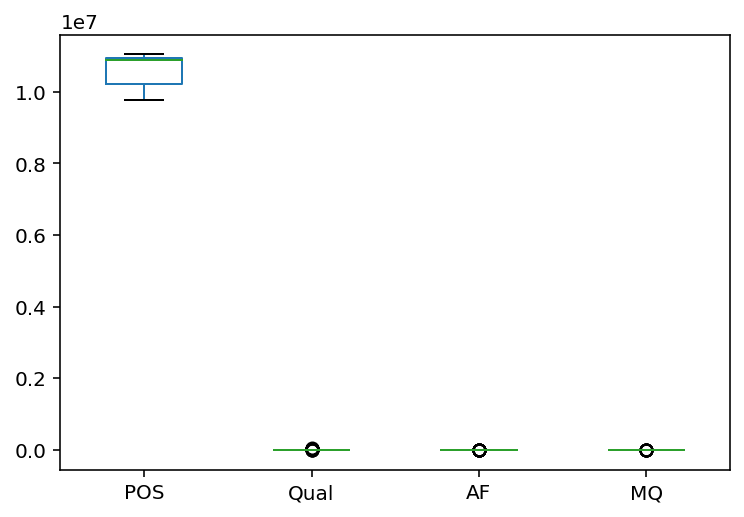

In [36]:
dfData.plot.box()
plt.show()

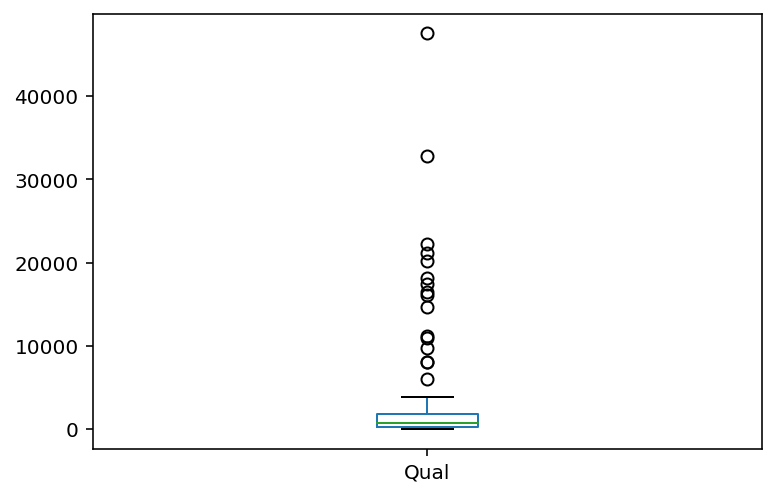

In [35]:
dfData["Qual"].plot.box()
plt.show()

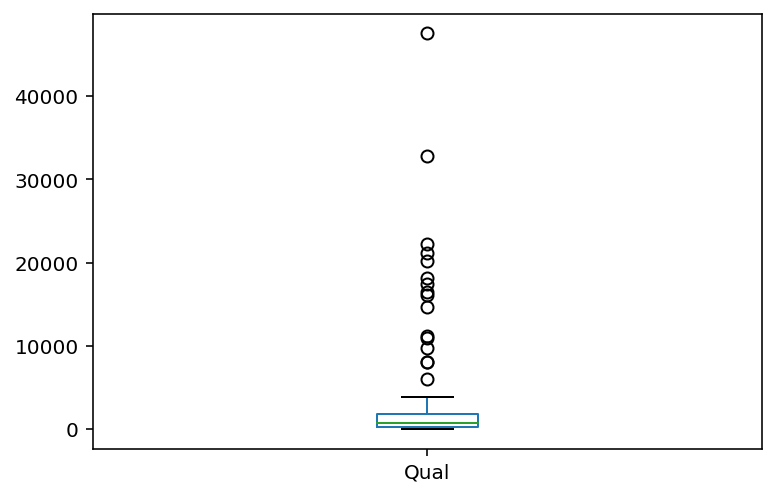

In [34]:
dfData.Qual.plot.box()
plt.show()

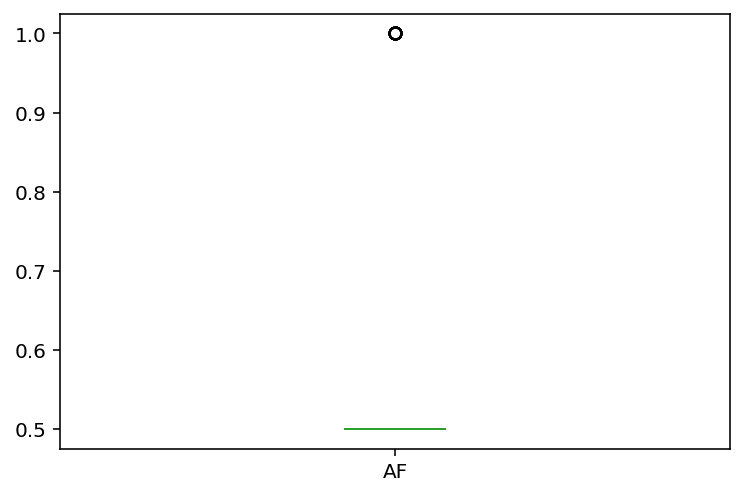

In [33]:
dfData.AF.plot.box()
plt.show()

In [26]:
dfData.AF.value_counts()

0.5    86
1.0    12
Name: AF, dtype: int64

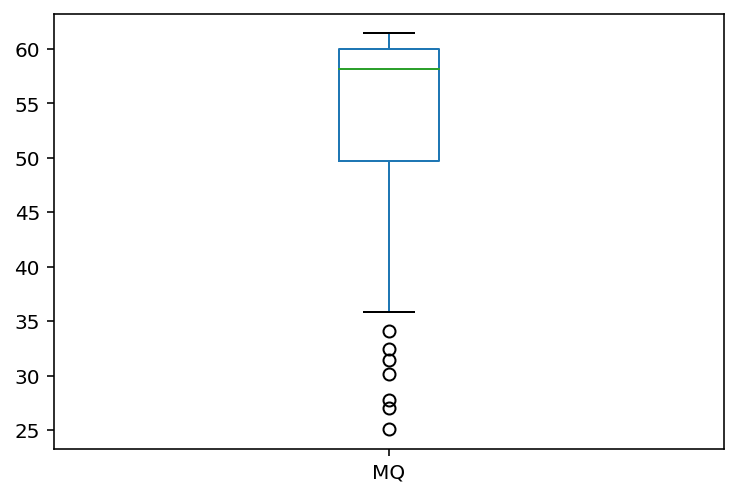

In [32]:
dfData.MQ.plot.box()
plt.show()

## Bar plot 그려보기

### SNP/INS/DEL

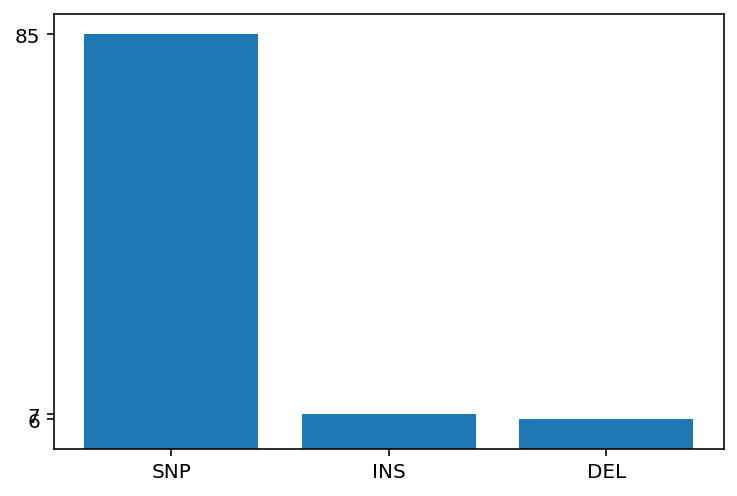

In [28]:
iSNP = dfData.VarType.value_counts()["SNP"]
iINS = dfData.VarType.value_counts()["DEL"]
iDEL = dfData.VarType.value_counts()["INS"]

y = [iSNP, iINS, iDEL ]
x = np.arange(len(y))
xlabel = ['SNP', 'INS', 'DEL']
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.show()

### Ts/TV

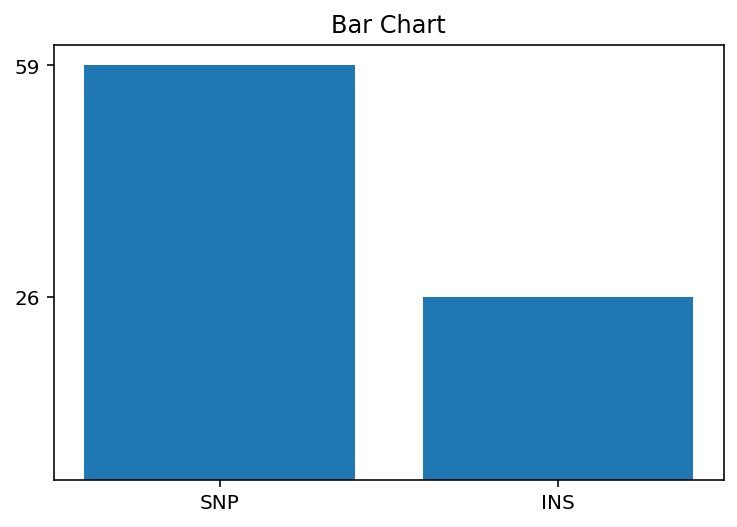

In [29]:
iTs = dfData.TsTv.value_counts()["ts"]
iTv = dfData.TsTv.value_counts()["tv"]

y = [iTs, iTv]
x = np.arange(len(y))
xlabel = ['SNP', 'INS', 'DEL']
plt.title("Bar Chart")
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.show()

## Scatter Plot 그려보기

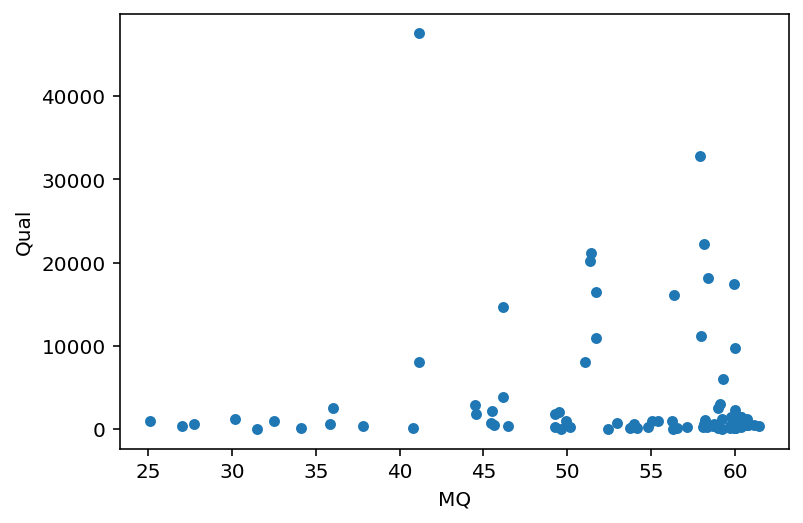

In [31]:
dfData.plot.scatter(x="MQ", y="Qual")
plt.show()